# Import Libraries

In [1]:
import pandas as pd
import numpy as no
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [13]:
#Define File Path
path = r"C:\Users\justi\Citi Bike Analysis"

In [22]:
df=pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'cleaned_citibike_df.csv'))

In [23]:
df.head()

,Unnamed: 0,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender
0,0,LnQzQk,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2
1,1,IL9boN,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1
2,2,46clGB,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1
3,3,v7vdFt,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2
4,4,VGBsb5,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,476,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,1978.0,0


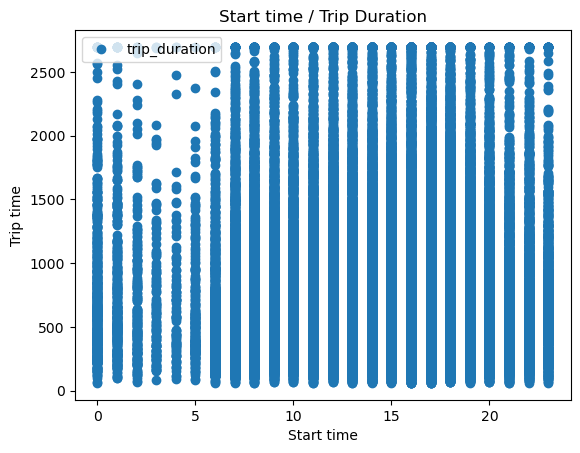

In [31]:
#Create Scatterplot
df.plot(x = 'start_hour', y= 'trip_duration' ,style='o') 
plt.title('Start time / Trip Duration')  
plt.xlabel('Start time')  
plt.ylabel('Trip time')  
plt.show()

# Prepare variables for regression

In [43]:
#reshape variables
X = df['start_hour'].values.reshape(-1, 1)
y = df['trip_duration'].values.reshape(-1, 1)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [44]:
#create linear regression
regression = LinearRegression()

In [46]:
#fit regression
regression.fit(X_train, y_train)

LinearRegression()

In [37]:
y_predicted = regression.predict(X_test)

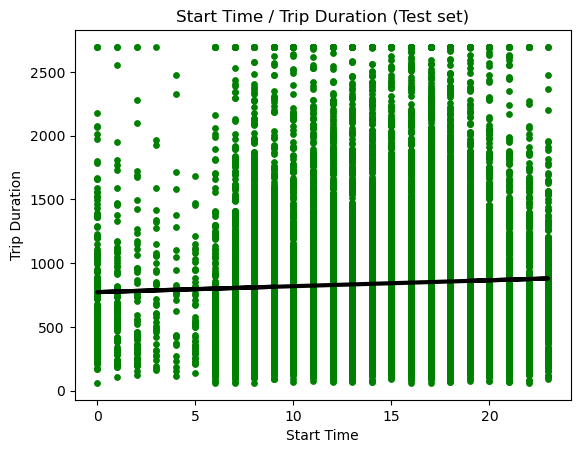

In [40]:
# Create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='green', s = 15)
plot_test.plot(X_test, y_predicted, color='black', linewidth =3)
plot_test.title('Start Time / Trip Duration (Test set)')
plot_test.xlabel('Start Time')
plot_test.ylabel('Trip Duration')
plot_test.show()

# Hypothesis: People ride longer during the middle hours of the day as opposed to the early morning/late night hours

In [47]:
# Create objects for model mean squared error and R2 score

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [49]:
#Print model summary stats
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[4.65557439]]
Mean squared error:  332413.319737807
R2 score:  0.001905259600111453


# 

In [50]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,360,861.031020
1,1626,865.686595
2,1137,861.031020
3,758,847.064297
4,306,772.575107
5,670,856.375446
6,330,809.819702
7,1105,842.408723
8,213,847.064297
9,259,851.719871
